In [312]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch

torch.set_printoptions(edgeitems=2)
torch.manual_seed(123)

In [313]:
from torchvision import datasets
data_path = './data/07/'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [314]:
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

In [315]:
len(cifar10)

50000

In [316]:
class_names = ['airplane','automobile','bird','cat','deer', 'dog','frog','horse','ship','truck']
img, label = cifar10[99]
img, label, class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32>, 1, 'automobile')

In [317]:
from torchvision import transforms
to_tensor = transforms.ToTensor()

In [318]:
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [319]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False,
transform=transforms.ToTensor())

In [320]:
img_t, _ = tensor_cifar10[99]
type(img_t)

torch.Tensor

In [321]:
img_t.shape, img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

In [322]:
img_t.min(), img_t.max()

(tensor(0.), tensor(1.))

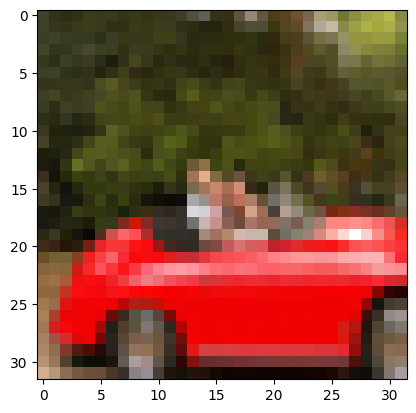

In [323]:
plt.imshow(img_t.permute(1, 2, 0))
plt.show()

In [324]:
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [325]:
imgs.view(3, -1).mean(dim=1)

tensor([0.4914, 0.4822, 0.4465])

In [326]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [327]:
transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))

Normalize(mean=(0.4915, 0.4823, 0.4468), std=(0.247, 0.2435, 0.2616))

In [328]:
transformed_cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


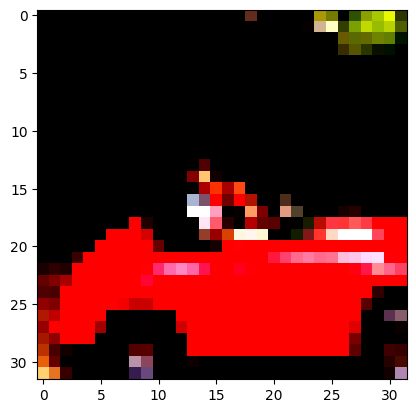

In [329]:
img_t, _ = transformed_cifar10[99]
plt.imshow(img_t.permute(1, 2, 0))
plt.show()

# Bird / Airplanes classification

In [330]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch

torch.set_printoptions(edgeitems=2)
torch.manual_seed(123)

In [331]:
class_names = ['airplane','automobile','bird','cat','deer', 'dog','frog','horse','ship','truck']

In [332]:
from torchvision import datasets, transforms
data_path = './data/06/'
cifar10 = datasets.CIFAR10(
    data_path, train=True, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

Files already downloaded and verified


In [333]:
cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [334]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label])
          for img, label in cifar10 
          if label in [0, 2]]
cifar2_val = [(img, label_map[label])
              for img, label in cifar10_val
              if label in [0, 2]]

In [335]:
import torch.nn as nn

n_out = 2

model = nn.Sequential(
            nn.Linear(
                3072,
                512,
            ),
            nn.Tanh(),
            nn.Linear(
                512,
                n_out,
            )
        )

In [336]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

In [337]:
x = torch.tensor([1.0, 2.0, 3.0])

In [338]:
softmax(x)

tensor([0.0900, 0.2447, 0.6652])

In [339]:
softmax(x).sum()

tensor(1.)

In [340]:
softmax = nn.Softmax(dim=1)

x = torch.tensor([[1.0, 2.0, 3.0],
                  [1.0, 2.0, 3.0]])

softmax(x)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

In [341]:
model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.Softmax(dim=1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


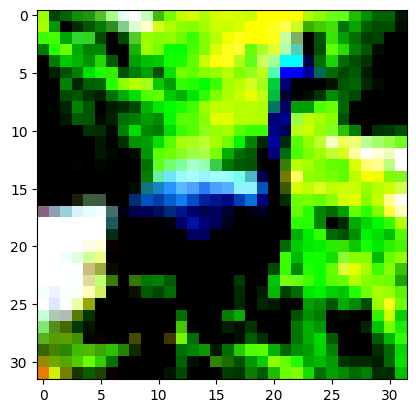

In [342]:
img, _ = cifar2[0]

plt.imshow(img.permute(1, 2, 0))
plt.show()

In [343]:
img_batch = img.view(-1).unsqueeze(0)

In [344]:
out = model(img_batch)
out

tensor([[0.4784, 0.5216]], grad_fn=<SoftmaxBackward0>)

In [345]:
_, index = torch.max(out, dim=1)
index

tensor([1])

In [346]:
out = torch.tensor([
    [0.6, 0.4],
    [0.9, 0.1],
    [0.3, 0.7],
    [0.2, 0.8],
])
class_index = torch.tensor([0, 0, 1, 1]).unsqueeze(1)

truth = torch.zeros((4,2))
truth.scatter_(dim=1, index=class_index, value=1.0)
truth

tensor([[1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.]])

In [347]:
def mse(out):
    return ((out - truth) ** 2).sum(dim=1).mean()
mse(out)

tensor(0.1500)

In [348]:
out.gather(dim=1, index=class_index)

tensor([[0.6000],
        [0.9000],
        [0.7000],
        [0.8000]])

In [349]:
def likelihood(out):
    prod = 1.0
    for x in out.gather(dim=1, index=class_index):
        prod *= x
    return prod

likelihood(out)

tensor([0.3024])

In [350]:
def neg_log_likelihood(out):
    return -likelihood(out).log()

neg_log_likelihood(out)

tensor([1.1960])

In [351]:
out0 = out.clone().detach()
out0[0] = torch.tensor([0.9, 0.1])

out2 = out.clone().detach()
out2[0] = torch.tensor([0.4, 0.6])

out3 = out.clone().detach()
out3[0] = torch.tensor([0.1, 0.9])

mse_comparison = torch.tensor([mse(o) for o in [out0, out, out2, out3]])
mse_comparison

tensor([0.0750, 0.1500, 0.2500, 0.4750])

In [352]:
((mse_comparison / mse_comparison[1]) - 1) * 100

tensor([-50.0000,   0.0000,  66.6667, 216.6667])

In [353]:
nll_comparison = torch.tensor([neg_log_likelihood(o) 
                               for o in [out0, out, out2, out3]])
nll_comparison

tensor([0.7905, 1.1960, 1.6015, 2.9878])

In [354]:
((nll_comparison / nll_comparison[1]) - 1) * 100

tensor([-33.9016,   0.0000,  33.9016, 149.8121])

In [355]:
softmax = nn.Softmax(dim=1)

log_softmax = nn.LogSoftmax(dim=1)

x = torch.tensor([[0.0, 104.0]])

softmax(x)

tensor([[0., 1.]])

In [356]:
softmax = nn.Softmax(dim=1)

log_softmax = nn.LogSoftmax(dim=1)

x = torch.tensor([[0.0, 104.0]])

softmax(x)

tensor([[0., 1.]])

In [357]:
torch.log(softmax(x))

tensor([[-inf, 0.]])

In [358]:
log_softmax(x)

tensor([[-104.,    0.]])

In [359]:
torch.exp(log_softmax(x))

tensor([[0., 1.]])

In [360]:
model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.LogSoftmax(dim=1))

In [361]:
loss = nn.NLLLoss()

In [362]:
img, label = cifar2[0]
out = model(img.view(-1).unsqueeze(0))
loss(out, torch.tensor([label]))

tensor(0.5077, grad_fn=<NllLossBackward0>)

In [363]:
import torch
import torch.nn as nn
import torch.optim as optim

model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.LogSoftmax(dim=1))

learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()
n_epochs = 100

for epoch in range(n_epochs):
  for img, label in cifar2:
    out = model(img.view(-1).unsqueeze(0))
    loss = loss_fn(out, torch.tensor([label]))
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
      
  print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 7.436963
Epoch: 1, Loss: 2.969128
Epoch: 2, Loss: 7.077729
Epoch: 3, Loss: 5.504475
Epoch: 4, Loss: 10.688177
Epoch: 5, Loss: 1.415906
Epoch: 6, Loss: 9.292529
Epoch: 7, Loss: 12.116428
Epoch: 8, Loss: 6.664639
Epoch: 9, Loss: 8.686923
Epoch: 10, Loss: 1.676501
Epoch: 11, Loss: 9.437196
Epoch: 12, Loss: 6.798319
Epoch: 13, Loss: 9.473314
Epoch: 14, Loss: 11.948936
Epoch: 15, Loss: 4.188442
Epoch: 16, Loss: 8.429747
Epoch: 17, Loss: 7.383325
Epoch: 18, Loss: 14.331355
Epoch: 19, Loss: 12.217303
Epoch: 20, Loss: 10.154082
Epoch: 21, Loss: 7.567716
Epoch: 22, Loss: 18.498039
Epoch: 23, Loss: 19.353279
Epoch: 24, Loss: 21.337685
Epoch: 25, Loss: 4.962567
Epoch: 26, Loss: 5.043899
Epoch: 27, Loss: 5.354934
Epoch: 28, Loss: 9.891257
Epoch: 29, Loss: 2.224202
Epoch: 30, Loss: 13.390385
Epoch: 31, Loss: 6.390940
Epoch: 32, Loss: 4.031987
Epoch: 33, Loss: 9.465389
Epoch: 34, Loss: 2.435623
Epoch: 35, Loss: 0.620501
Epoch: 36, Loss: 8.690174
Epoch: 37, Loss: 11.238142
Epoch: 38, 

In [364]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.LogSoftmax(dim=1))

learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.NLLLoss()
n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))


Epoch: 0, Loss: 0.318367
Epoch: 1, Loss: 0.389473
Epoch: 2, Loss: 0.427979
Epoch: 3, Loss: 0.435714
Epoch: 4, Loss: 0.504344
Epoch: 5, Loss: 0.483689
Epoch: 6, Loss: 0.308372
Epoch: 7, Loss: 0.115488
Epoch: 8, Loss: 0.513510
Epoch: 9, Loss: 0.386493
Epoch: 10, Loss: 0.274975
Epoch: 11, Loss: 0.252231
Epoch: 12, Loss: 0.213218
Epoch: 13, Loss: 0.256708
Epoch: 14, Loss: 0.316772
Epoch: 15, Loss: 0.631465
Epoch: 16, Loss: 0.423488
Epoch: 17, Loss: 0.402730
Epoch: 18, Loss: 0.307367
Epoch: 19, Loss: 0.179422
Epoch: 20, Loss: 0.379566
Epoch: 21, Loss: 0.290748
Epoch: 22, Loss: 0.270363
Epoch: 23, Loss: 0.186533
Epoch: 24, Loss: 0.285739
Epoch: 25, Loss: 0.455766
Epoch: 26, Loss: 0.263250
Epoch: 27, Loss: 0.257489
Epoch: 28, Loss: 0.253201
Epoch: 29, Loss: 0.088151
Epoch: 30, Loss: 0.119370
Epoch: 31, Loss: 0.101625
Epoch: 32, Loss: 0.247492
Epoch: 33, Loss: 0.090906
Epoch: 34, Loss: 0.172537
Epoch: 35, Loss: 0.462267
Epoch: 36, Loss: 0.273000
Epoch: 37, Loss: 0.254223
Epoch: 38, Loss: 0.348

In [365]:
cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))
cifar2_val = [(img, label_map[label])
              for img, label in cifar10_val
              if label in [0, 2]]

In [366]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.810500


In [367]:
import torch
import torch.nn as nn
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.367593
Epoch: 1, Loss: 0.867402
Epoch: 2, Loss: 0.410718
Epoch: 3, Loss: 0.404002
Epoch: 4, Loss: 0.374927
Epoch: 5, Loss: 0.308276
Epoch: 6, Loss: 0.389578
Epoch: 7, Loss: 0.216078
Epoch: 8, Loss: 0.170842
Epoch: 9, Loss: 0.515957
Epoch: 10, Loss: 0.441018
Epoch: 11, Loss: 0.455845
Epoch: 12, Loss: 0.427009
Epoch: 13, Loss: 0.172030
Epoch: 14, Loss: 0.368295
Epoch: 15, Loss: 0.465092
Epoch: 16, Loss: 0.259483
Epoch: 17, Loss: 0.122045
Epoch: 18, Loss: 0.403431
Epoch: 19, Loss: 0.213073
Epoch: 20, Loss: 0.280044
Epoch: 21, Loss: 0.591017
Epoch: 22, Loss: 0.233892
Epoch: 23, Loss: 0.248117
Epoch: 24, Loss: 0.431227
Epoch: 25, Loss: 0.190770
Epoch: 26, Loss: 0.391573
Epoch: 27, Loss: 0.132206
Epoch: 28, Loss: 0.318764
Epoch: 29, Loss: 0.396118
Epoch: 30, Loss: 0.339462
Epoch: 31, Loss: 0.110825
Epoch: 32, Loss: 0.152879
Epoch: 33, Loss: 0.165611
Epoch: 34, Loss: 0.161831
Epoch: 35, Loss: 0.049107
Epoch: 36, Loss: 0.050863
Epoch: 37, Loss: 0.137641
Epoch: 38, Loss: 0.073

In [368]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.994100


In [369]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.806500


In [370]:
sum([p.numel() for p in model.parameters()])

3737474

In [371]:
sum([p.numel() for p in model.parameters() if p.requires_grad == True])

3737474